# Literature Analyses - Frequency Ranges

In [1]:
from pathlib import Path
from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import local code
from local.utils import replace_multi_str, convert_franges                        
from local.plts import plot_franges, savefig

In [3]:
import seaborn as sns
sns.set_context('paper')

## Settings

In [4]:
# Define figure save path folder
save_folder = Path('./figs/')

In [5]:
# Data settings
ADD_MULTIPLE_RANGES = False

In [6]:
# Set the notebook run settings 
SAVE_FIG = False

## Load the Data

In [7]:
# Set the file name
file_foler = Path('../data/')
file_name = 'apc_data.csv'

In [8]:
# Load the data
df = pd.read_csv(file_foler / file_name, skiprows=[0])

In [9]:
# Drop the null rows
df = df.dropna()

## Manage Fit Range Data

#### Collect multiple fit range values

In [10]:
# Collect the multi range values
multi_ranges = []
for fr in df['Fit Range'].values:
    if '\u2028' in fr:
        multi_ranges.append(fr)

In [11]:
print(multi_ranges)

['2-50\u20281-30', '1-45\u202830-45', 'low\u2028high', '1-15\u202815-45', '40-90\u202810-50']


In [12]:
# Split and clean up freq ranges defined in a multi range list
multi_ranges = [el.split('\u2028') for el in multi_ranges]
multi_ranges = [el for lst in multi_ranges for el in lst]
multi_ranges = [el for el in multi_ranges if '-' in el]
print(multi_ranges)

['2-50', '1-30', '1-45', '30-45', '1-15', '15-45', '40-90', '10-50']


In [13]:
# Replace multiple ranges with 'multiple'
df = replace_multi_str(df, 'Fit Range')

#### Count frequency range occurences

In [14]:
# Count occurences of frequency ranges
fr_counter = Counter(df['Fit Range'])

In [15]:
# Pop and grab counts of multiple and unclear
n_mult = fr_counter.pop('multiple')
n_uncl = fr_counter.pop('unclear')

In [16]:
print('# of multiple: {}'.format(n_mult))
print('# of unclear : {}'.format(n_uncl))

# of multiple: 9
# of unclear : 24


In [17]:
# Convert frequency ranges to tuples of float
ranges = {convert_franges(crange) : count for crange, count in fr_counter.items()}

#### Add multiple ranges to counts

In [18]:
if ADD_MULTIPLE_RANGES:
    for mrange in multi_ranges:
        cmrange = convert_frange(mrange)
        if cmrange in ranges:
            ranges[cmrange] += 1 
        else:
            ranges[cmrange] = 1

In [19]:
# Collect list of all ranges (including multiples)
all_ranges = []
for frange in sorted(ranges):
    for ii in range(ranges[frange]):
        all_ranges.append(frange)

### Plot all ranges

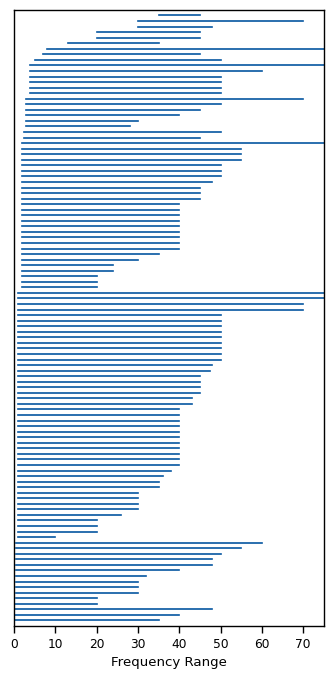

In [20]:
# Plot all ranges
plot_franges(all_ranges)

### Plot - once per range definition

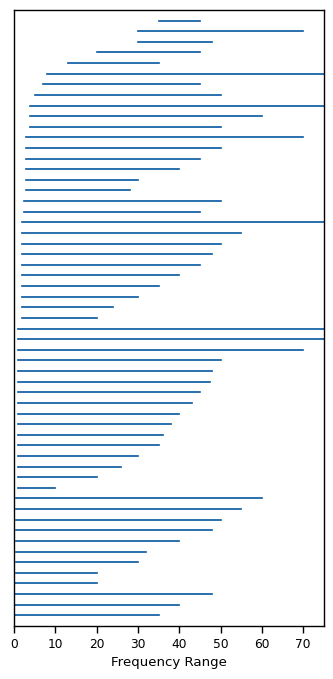

In [21]:
# Plot once per range
plot_franges(ranges)

### Frequency Value Occurences

In [22]:
print('N studies included: ', len(all_ranges))

N studies included:  110


In [23]:
# Settings
bs = 0.25
sf = 0
ef = 75

In [24]:
# Threshold values to check
thresh1 = 0.85
thresh2 = 0.50

In [25]:
# Define range of frequency to check
all_freqs = np.arange(sf, ef + bs, bs)

In [26]:
# Collect ratio of how often each frequency is included in a defined frequency range
counts = np.zeros(len(all_freqs))
for crange in all_ranges:
    counts = counts + np.isin(all_freqs, np.arange(crange[0], crange[1] + bs, bs))
counts = counts / len(all_ranges)

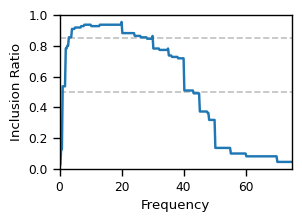

In [27]:
# Plot frequency value occurence plot
fig, ax = plt.subplots(figsize=(3, 2))
ax.plot(all_freqs, counts, lw=1.75)
ax.set(xlim=[0, 75], ylim=[0, 1], xlabel='Frequency', ylabel='Inclusion Ratio')
ax.axhline(thresh1, linestyle='--', color='black', alpha=0.25, zorder=1)
ax.axhline(thresh2, linestyle='--', color='black', alpha=0.25, zorder=1)

In [28]:
# Check range - high threshold
included_freqs1 = all_freqs[counts > thresh1]
print('Most included range: {}-{} Hz.'.format(min(included_freqs1), max(included_freqs1)))

Most included range: 3.0-30.0 Hz.


In [29]:
# Check included - medium threshold
included_freqs2 = all_freqs[counts > thresh2]
print('Most included range: {}-{} Hz.'.format(min(included_freqs2), max(included_freqs2)))

Most included range: 1.0-43.0 Hz.
